In [1]:
! python --version

Python 3.10.6


## SEER Breast Cancer Dataset: ETL & EDA
### Sarah Warda

<br>

The purpose of this notebook is to load the data set, assess data types of the variables, examine distributions of single variables, and examine pairwise relationships of possible significance. The overall purpose of the project is to generate two dashboards in tableau using any information we learn in these notebooks, so discussion within the notebooks is a little more limited, for now.

The `SEER Breast Cancer Dataset` can be found at this link: https://ieee-dataport.org/open-access/seer-breast-cancer-data

<br>

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import random as py_random
import numpy.random as np_random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")

## Index

- [ETL: Prepare Dataset for Analysis](#Extract,-Transform,-Load)
- [EDA: Evaluate variables and their Relationships with Target Variable](#Exploratory-Data-Analysis)
    - [Single Variable Exploration](#Single-Variable-Exploration)
        - [Age](#Age)
        - [Race](#Race)
        - [Marital Status](#Marital-Status)
        - [T-Stage](#T-Stage)
        - [N-Stage](#N-Stage)
        - [6th-Stage](#6th-Stage)
        - [Grade](#Grade)
        - [A-Stage](#A-Stage)
        - [Tumor Size](#Tumor-Size)
        - [Estrogen Status](#Estrogen-Status)
        - [Progesterone Status](#Progesterone-Status)
        - [Regional Node Examined](#Regional-Node-Examined)
        - [Regional Node Positive](#Regional-Node-Positive)
        - [Survival Months](#Survival-Months)
        - [Status](#Status)
    - [Pairwise Relationships](#Pairwise-Relationships)
        - [Status vs. Age](#Status-vs.-Age)
        - [Status vs. Race](#Status-vs.-Race)
        - [Status vs. Marital Status](#Status-vs.-Marital-Status)
        - [Status vs. T-Stage](#Status-vs.-T-Stage)
        - [Status vs. N-Stage](#Status-vs.-N-Stage)
        - [Status vs. 6th-Stage](#Status-vs.-6th-Stage)
        - [Status vs. Grade](#Status-vs.-Grade)
        - [Status vs. A-Stage](#Status-vs.-A-Stage)
        - [Status vs. Tumor Size](#Status-vs.-Tumor-Size)
        - [Status vs. Estrogen Status](#Status-vs.-Estrogen-Status)
        - [Status vs. Progesterone Status](#Status-vs.-Progesterone-Status)
        - [Status vs. Regional Node Examined](#Status-vs.-Regional-Node-Examined)
        - [Status vs. Regional Node Positive](#Status-vs.-Regional-Node-Positive)
        - [Status vs. Survival Months](#Status-vs.-Survival-Months)

## Extract, Transform, Load

[Index](#Index)

In [4]:
df = pd.read_csv('SEER Breast Cancer.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [6]:
# this is a blank column used to separate sections in the csv. It serves no purpose in analysis
df = df.drop(df.columns[3], axis=1) 

# some column headers have spaces that make it hard to reference variables
df.columns = df.columns.str.replace(' ', '') 

# correct a typo in one of the column names
df = df.rename(columns={'ReginolNodePositive' : 'RegionalNodePositive'}) #fix typo in column name

df.head()

,Age,Race,MaritalStatus,TStage,NStage,6thStage,Grade,AStage,TumorSize,EstrogenStatus,ProgesteroneStatus,RegionalNodeExamined,RegionalNodePositive,SurvivalMonths,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [7]:
df.to_csv('SEER Breast Cancer clean.csv', index=False)

## Exploratory Data Analysis
[Index](#Index)

For the single variable exploration, every variable will be evaluated based on their data type. For pairwise relationships, every variable will be evaluated against the target variable, which is `Status`, to gain insight on their feature importance.

### Single Variable Exploration

#### Age

[Index](#Index)

In [8]:
pd.DataFrame(df.Age.describe())

,Age
count,4024.000000
mean,53.972167
std,8.963134
min,30.000000
25%,47.000000
50%,54.000000
75%,61.000000
max,69.000000


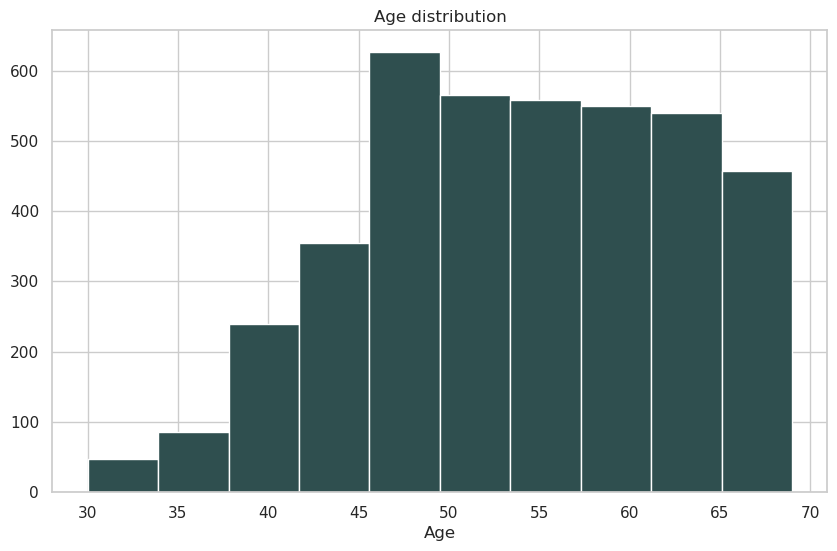

In [9]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.Age, color="darkslategray")
axes.set_title("Age distribution")
axes.set_xlabel("Age")

plt.show()
plt.close()

#### Race

[Index](#Index)

In [10]:
pd.DataFrame(df.Race.describe())

,Race
count,4024
unique,3
top,White
freq,3413


In [11]:
pd.DataFrame(df.Race.value_counts())

,Race
White,3413
"Other (American Indian/AK Native, Asian/Pacific Islander)",320
Black,291


#### Marital Status

[Index](#Index)

In [12]:
pd.DataFrame(df.MaritalStatus.describe())

,MaritalStatus
count,4024
unique,5
top,Married (including common law)
freq,2643


In [13]:
pd.DataFrame(df.MaritalStatus.value_counts())

,MaritalStatus
Married (including common law),2643
Single (never married),615
Divorced,486
Widowed,235
Separated,45


#### T-Stage

[Index](#Index)

In [14]:
pd.DataFrame(df.TStage.describe())

,TStage
count,4024
unique,4
top,T2
freq,1786


In [15]:
pd.DataFrame(df.TStage.value_counts())

,TStage
T2,1786
T1,1603
T3,533
T4,102


#### N-Stage

[Index](#Index)

In [16]:
pd.DataFrame(df.NStage.describe())

,NStage
count,4024
unique,3
top,N1
freq,2732


In [17]:
pd.DataFrame(df.NStage.value_counts())

,NStage
N1,2732
N2,820
N3,472


#### 6th Stage

[Index](#Index)

In [18]:
pd.DataFrame(df['6thStage'].describe())

,6thStage
count,4024
unique,5
top,IIA
freq,1305


In [19]:
pd.DataFrame(df['6thStage'].value_counts())

,6thStage
IIA,1305
IIB,1130
IIIA,1050
IIIC,472
IIIB,67


#### Grade

[Index](#Index)

In [20]:
pd.DataFrame(df.Grade.describe())

,Grade
count,4024
unique,4
top,Moderately differentiated; Grade II
freq,2351


In [21]:
pd.DataFrame(df.Grade.value_counts())

,Grade
Moderately differentiated; Grade II,2351
Poorly differentiated; Grade III,1111
Well differentiated; Grade I,543
Undifferentiated; anaplastic; Grade IV,19


#### A-Stage

[Index](#Index)

In [22]:
pd.DataFrame(df.AStage.describe())

,AStage
count,4024
unique,2
top,Regional
freq,3932


In [23]:
pd.DataFrame(df.AStage.value_counts())

,AStage
Regional,3932
Distant,92


#### Tumor Size

[Index](#Index)

In [24]:
pd.DataFrame(df.TumorSize.describe())

,TumorSize
count,4024.000000
mean,30.473658
std,21.119696
min,1.000000
25%,16.000000
50%,25.000000
75%,38.000000
max,140.000000


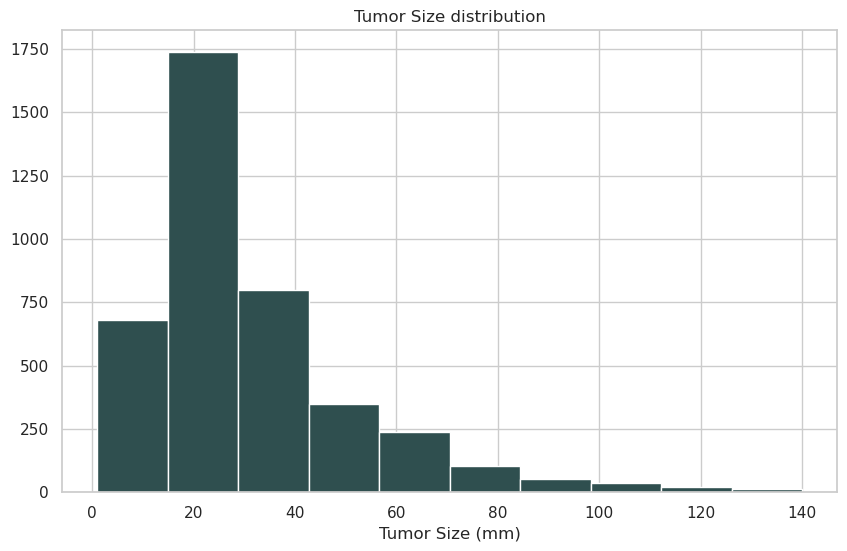

In [25]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.TumorSize, color="darkslategray")
axes.set_title("Tumor Size distribution")
axes.set_xlabel("Tumor Size (mm)")

plt.show()
plt.close()

#### Estrogen Status

[Index](#Index)

In [26]:
pd.DataFrame(df.EstrogenStatus.describe())

,EstrogenStatus
count,4024
unique,2
top,Positive
freq,3755


In [27]:
pd.DataFrame(df.EstrogenStatus.value_counts())

,EstrogenStatus
Positive,3755
Negative,269


#### Progesterone Status

[Index](#Index)

In [28]:
pd.DataFrame(df.ProgesteroneStatus.describe())

,ProgesteroneStatus
count,4024
unique,2
top,Positive
freq,3326


In [29]:
pd.DataFrame(df.ProgesteroneStatus.value_counts())

,ProgesteroneStatus
Positive,3326
Negative,698


#### Regional Node Examined

[Index](#Index)

In [30]:
pd.DataFrame(df.RegionalNodeExamined.describe())

,RegionalNodeExamined
count,4024.000000
mean,14.357107
std,8.099675
min,1.000000
25%,9.000000
50%,14.000000
75%,19.000000
max,61.000000


In [31]:
pd.DataFrame(df.RegionalNodeExamined.value_counts())

,RegionalNodeExamined
13,251
14,225
16,221
12,205
9,198
15,195
11,191
10,183
18,176
17,175


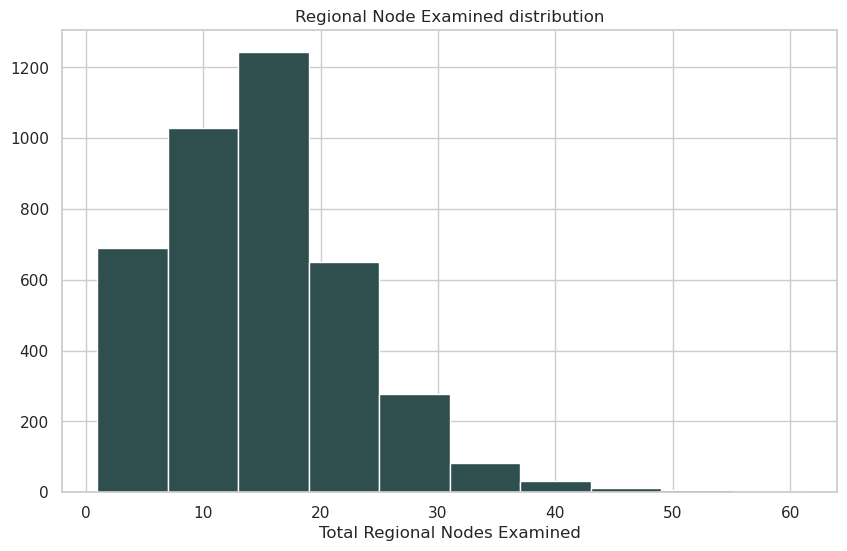

In [32]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.RegionalNodeExamined, color="darkslategray")
axes.set_title("Regional Node Examined distribution")
axes.set_xlabel("Total Regional Nodes Examined")

plt.show()
plt.close()

#### Regional Node Positive

[Index](#Index)

In [33]:
pd.DataFrame(df.RegionalNodePositive.describe())

,RegionalNodePositive
count,4024.000000
mean,4.158052
std,5.109331
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,46.000000


In [34]:
pd.DataFrame(df.RegionalNodePositive.value_counts())

,RegionalNodePositive
1,1522
2,740
3,420
4,261
5,207
6,140
7,108
9,90
8,75
10,61


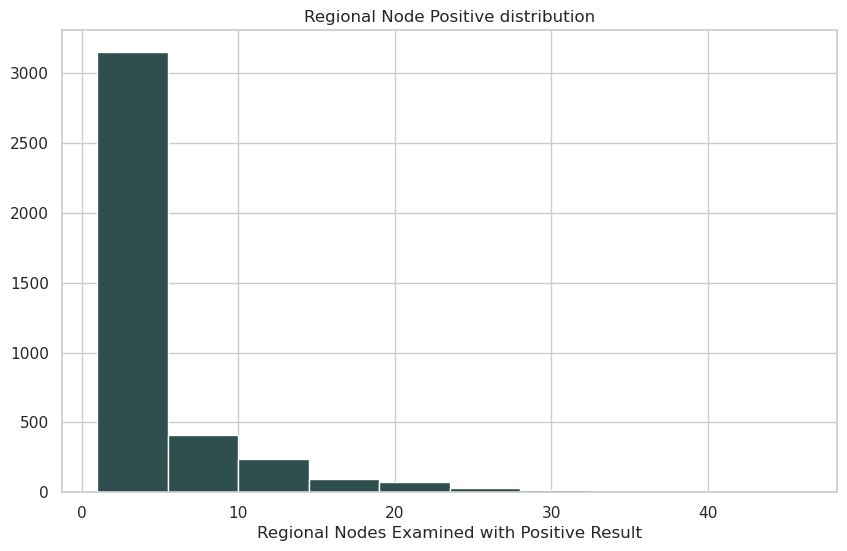

In [35]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.RegionalNodePositive, color="darkslategray")
axes.set_title("Regional Node Positive distribution")
axes.set_xlabel("Regional Nodes Examined with Positive Result")

plt.show()
plt.close()

#### Survival Months

[Index](#Index)

In [36]:
pd.DataFrame(df.SurvivalMonths.describe())

,SurvivalMonths
count,4024.000000
mean,71.297962
std,22.921430
min,1.000000
25%,56.000000
50%,73.000000
75%,90.000000
max,107.000000


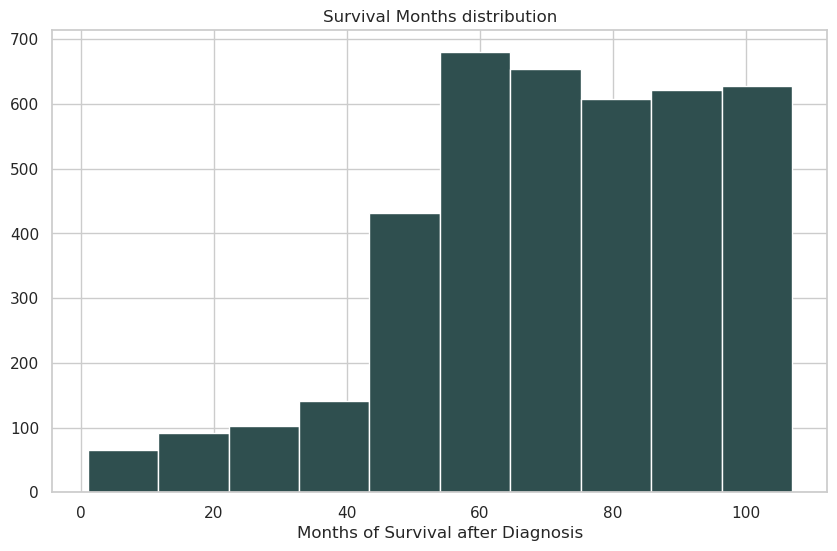

In [37]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.SurvivalMonths, color="darkslategray")
axes.set_title("Survival Months distribution")
axes.set_xlabel("Months of Survival after Diagnosis")

plt.show()
plt.close()

#### Status

[Index](#Index)

In [38]:
pd.DataFrame(df.Status.describe())

,Status
count,4024
unique,2
top,Alive
freq,3408


In [39]:
pd.DataFrame(df.Status.value_counts())

,Status
Alive,3408
Dead,616


### Pairwise Relationships

[Index](#Index)

In [40]:
# Categorical vs Categorical Functions
def heatmap_categoricals(data, x, y):
    result =  pd.crosstab( data[ x], data[ y]).apply(lambda r: r/len(data), axis=1)
    print(result)
    sns.heatmap( result, cmap=sns.cm.mako_r);

# Numerical vs Categorical Functions
def describe_by_category(data, numeric, categorical):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    print(grouped_y) 
    
def multiboxplot(data, numeric, categorical, skip_data_points=True):
    figure = plt.figure(figsize=(10, 6))
    axes = figure.add_subplot(1, 1, 1)

    grouped = data.groupby(categorical)
    labels = pd.unique(data[categorical].values)
    labels.sort()
    grouped_data = [grouped[numeric].get_group( k) for k in labels]
    patch = axes.boxplot( grouped_data, labels=labels, patch_artist=True, zorder=1)

    if not skip_data_points:
        for i, k in enumerate(labels):
            subdata = grouped[numeric].get_group( k)
            x = np.random.normal(i + 1, 0.01, size=len(subdata))
            axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)

    axes.set_xlabel(categorical)
    axes.set_ylabel(numeric)
    axes.set_title("Distribution of {0} by {1}".format(numeric, categorical))
    plt.show()
    plt.close()

#### Status vs. Age

[Index](#Index)

In [41]:
df['Status_str'] = df['Status']
status_map = {'Alive':1, 'Dead':0}
df['Status'] = df['Status'].map(status_map)

In [42]:
describe_by_category(df, "Age", "Status")

         count       mean       std   min   25%   50%   75%   max
Status                                                           
0        616.0  55.150974  9.698291  30.0  48.0  56.5  63.0  69.0
1       3408.0  53.759096  8.808420  30.0  47.0  54.0  61.0  69.0


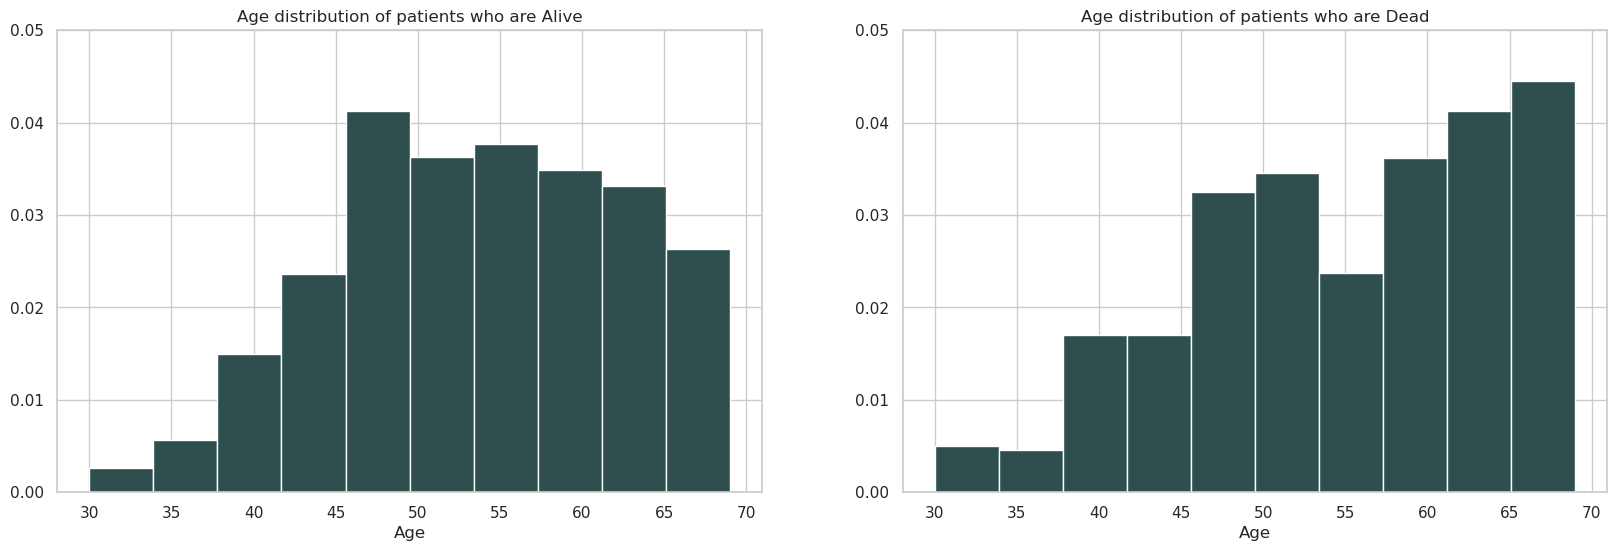

In [43]:
grouped = df.groupby("Status")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist(grouped["Age"].get_group(1),color="darkslategray",density=True)
axes.set_title("Age distribution of patients who are Alive")
axes.set_xlabel("Age")
axes.set_ylim((0,0.05))

axes = figure.add_subplot(1, 2, 2)
axes.hist(grouped["Age"].get_group(0),color="darkslategray",density=True)
axes.set_title("Age distribution of patients who are Dead")
axes.set_xlabel("Age")
axes.set_ylim((0,0.05))

plt.show()
plt.close()

#### Status vs. Race

[Index](#Index)

Status_str                                             Alive      Dead
Race                                                                  
Black                                               0.054175  0.018141
Other (American Indian/AK Native, Asian/Pacific...  0.071322  0.008201
White                                               0.721421  0.126740


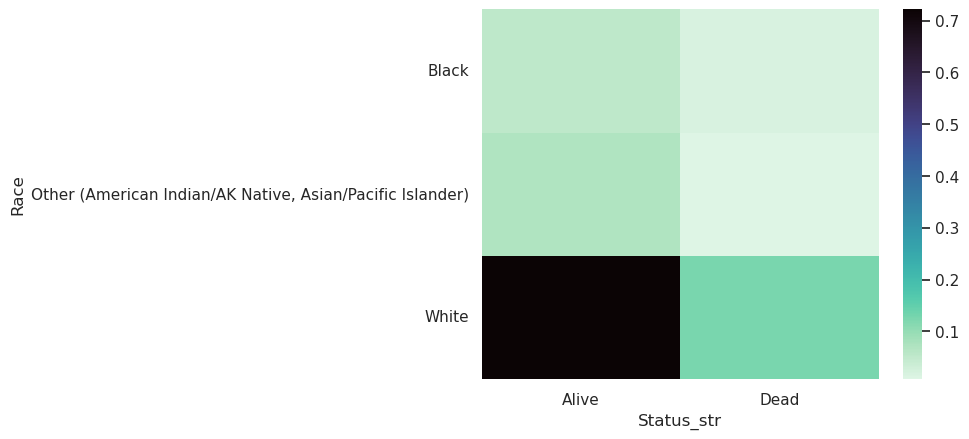

In [44]:
heatmap_categoricals(df, 'Race', 'Status_str')

#### Status vs. Marital Status

[Index](#Index)

Status_str                         Alive      Dead
MaritalStatus                                     
Divorced                        0.098410  0.022366
Married (including common law)  0.567843  0.088966
Separated                       0.007455  0.003728
Single (never married)          0.126988  0.025845
Widowed                         0.046223  0.012177


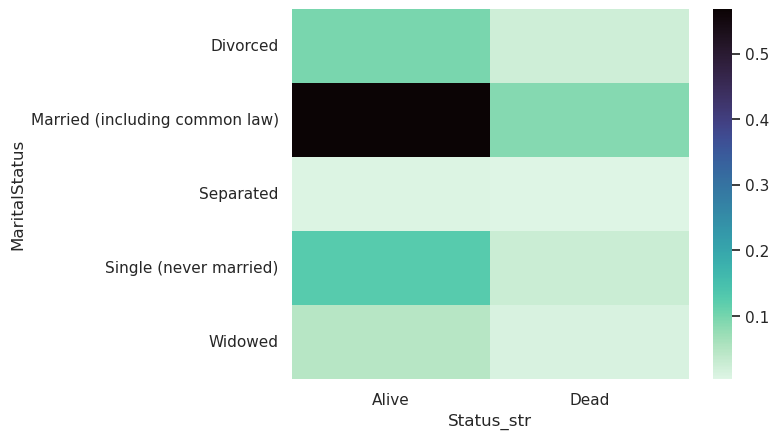

In [45]:
heatmap_categoricals(df, 'MaritalStatus', 'Status_str')

#### Status vs. T-Stage

[Index](#Index)

Status_str     Alive      Dead
TStage                        
T1          0.359344  0.039016
T2          0.368539  0.075298
T3          0.103628  0.028827
T4          0.015408  0.009940


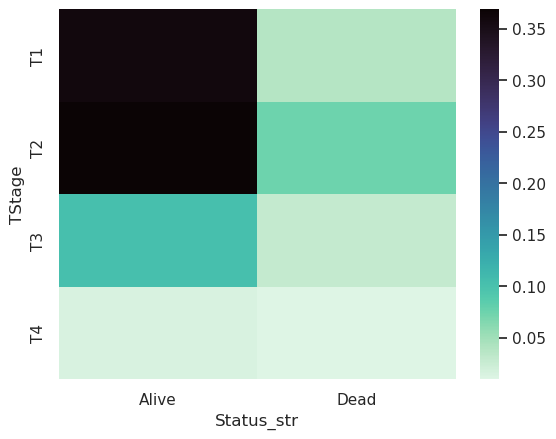

In [46]:
heatmap_categoricals(df, 'TStage', 'Status_str')

#### Status vs. N-Stage

[Index](#Index)

Status_str     Alive      Dead
NStage                        
N1          0.611829  0.067097
N2          0.162773  0.041004
N3          0.072316  0.044980


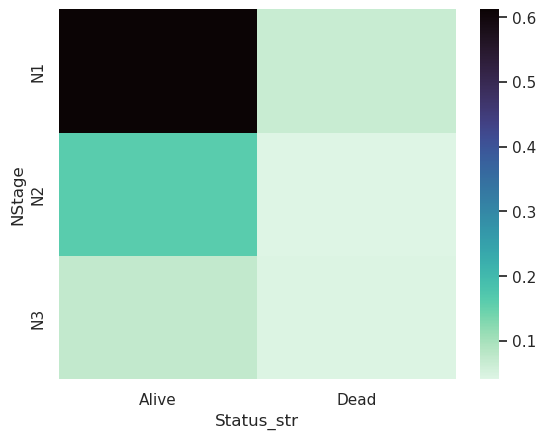

In [47]:
heatmap_categoricals(df, 'NStage', 'Status_str')

#### Status vs. 6th-Stage

[Index](#Index)

Status_str     Alive      Dead
6thStage                      
IIA         0.300447  0.023857
IIB         0.247266  0.033549
IIIA        0.215209  0.045726
IIIB        0.011680  0.004970
IIIC        0.072316  0.044980


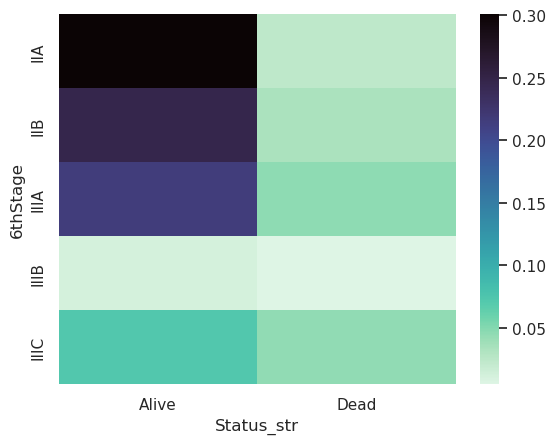

In [48]:
heatmap_categoricals(df, '6thStage', 'Status_str')

#### Status vs. Grade

[Index](#Index)

Status_str                                 Alive      Dead
Grade                                                     
Moderately differentiated; Grade II     0.508449  0.075795
Poorly differentiated; Grade III        0.210736  0.065358
Undifferentiated; anaplastic; Grade IV  0.002485  0.002237
Well differentiated; Grade I            0.125249  0.009692


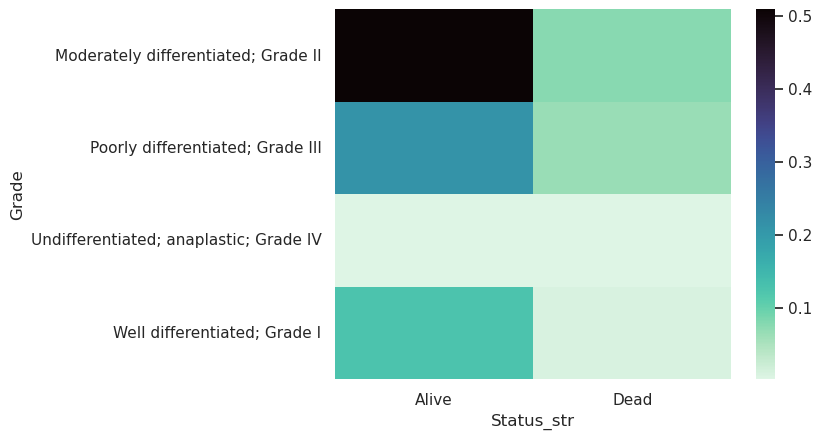

In [49]:
heatmap_categoricals(df, 'Grade', 'Status_str')

#### Status vs. A-Stage

[Index](#Index)

Status_str     Alive      Dead
AStage                        
Distant     0.014165  0.008698
Regional    0.832753  0.144384


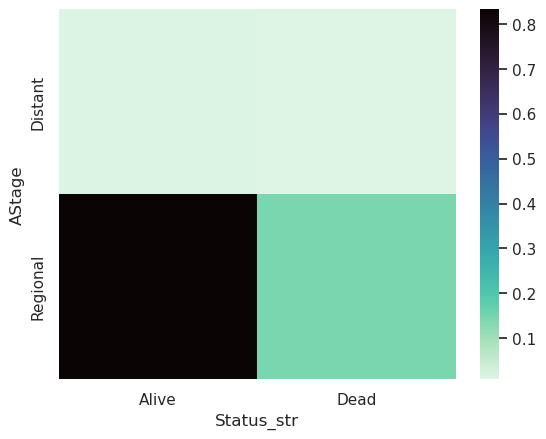

In [50]:
heatmap_categoricals(df, 'AStage', 'Status_str')

#### Status vs. Tumor Size

[Index](#Index)

In [51]:
describe_by_category(df, "TumorSize", "Status_str")

             count       mean        std  min   25%   50%   75%    max
Status_str                                                            
Alive       3408.0  29.268779  20.303175  1.0  15.0  23.0  35.0  140.0
Dead         616.0  37.139610  24.116115  1.0  20.0  30.0  50.0  140.0


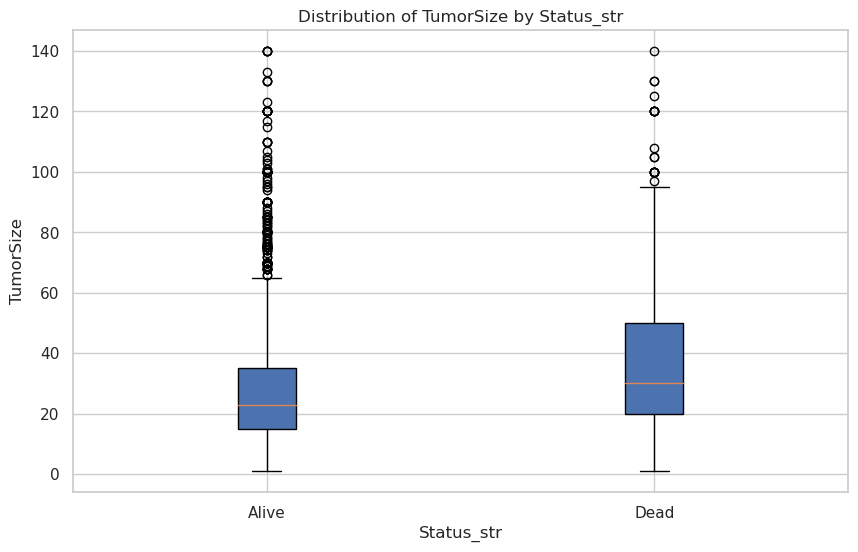

In [52]:
multiboxplot(df, "TumorSize", "Status_str")

#### Status vs. Estrogen Status

[Index](#Index)

Status_str         Alive      Dead
EstrogenStatus                    
Negative        0.040010  0.026839
Positive        0.806909  0.126243


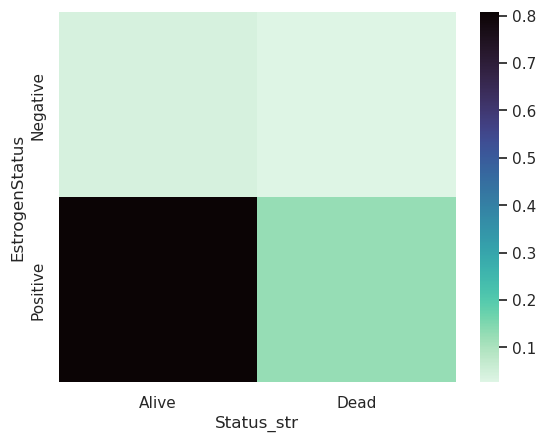

In [53]:
heatmap_categoricals(df, 'EstrogenStatus', 'Status_str')

#### Status vs. Progesterone Status

[Index](#Index)

Status_str             Alive      Dead
ProgesteroneStatus                    
Negative            0.122763  0.050696
Positive            0.724155  0.102386


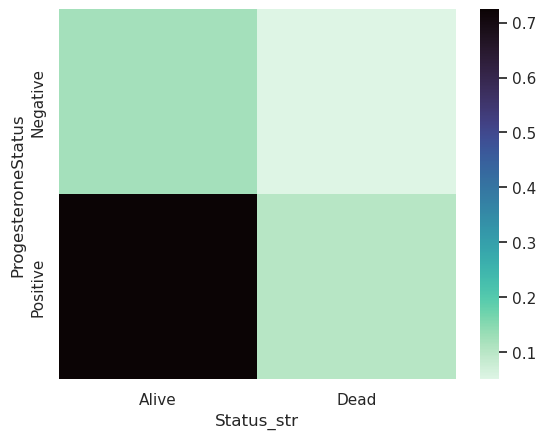

In [54]:
heatmap_categoricals(df, 'ProgesteroneStatus', 'Status_str')

#### Status vs. Regional Node Examined

[Index](#Index)

In [55]:
describe_by_category(df, "RegionalNodeExamined", "Status_str")

             count       mean       std  min  25%   50%   75%   max
Status_str                                                         
Alive       3408.0  14.237383  8.023208  1.0  9.0  14.0  19.0  61.0
Dead         616.0  15.019481  8.486600  1.0  9.0  14.0  20.0  57.0


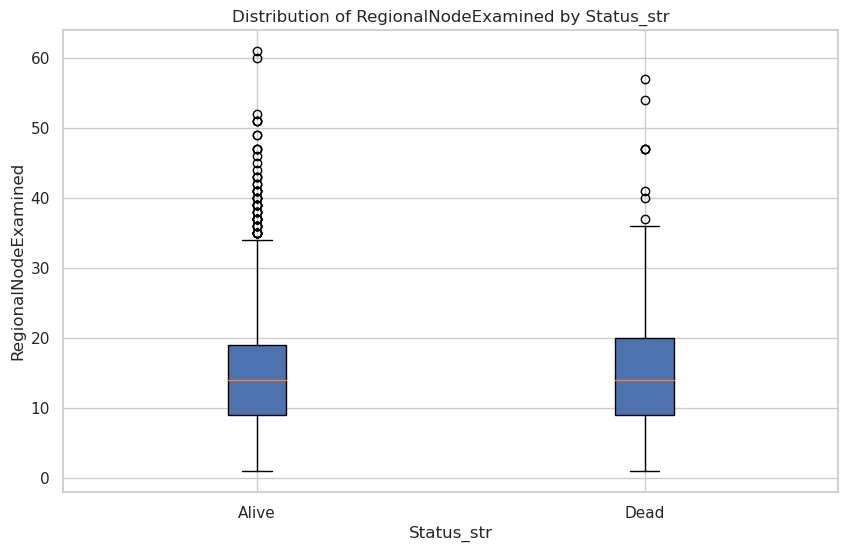

In [56]:
multiboxplot(df, "RegionalNodeExamined", "Status_str")

#### Status vs. Regional Node Positive

[Index](#Index)

In [57]:
describe_by_category(df, "RegionalNodePositive", "Status_str")

             count      mean       std  min  25%  50%   75%   max
Status_str                                                       
Alive       3408.0  3.600646  4.375180  1.0  1.0  2.0   4.0  41.0
Dead         616.0  7.241883  7.312642  1.0  2.0  4.0  10.0  46.0


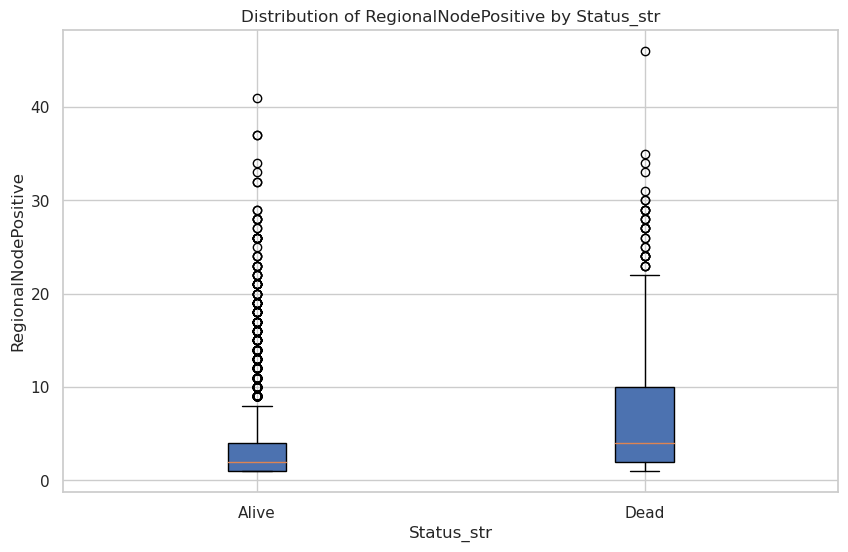

In [58]:
multiboxplot(df, "RegionalNodePositive", "Status_str")

#### Status vs. Survival Months

[Index](#Index)

In [59]:
describe_by_category(df, "SurvivalMonths", "Status_str")

             count       mean        std  min   25%   50%   75%    max
Status_str                                                            
Alive       3408.0  75.941021  19.386459  1.0  61.0  77.0  92.0  107.0
Dead         616.0  45.610390  23.966253  2.0  27.0  44.0  61.0  102.0


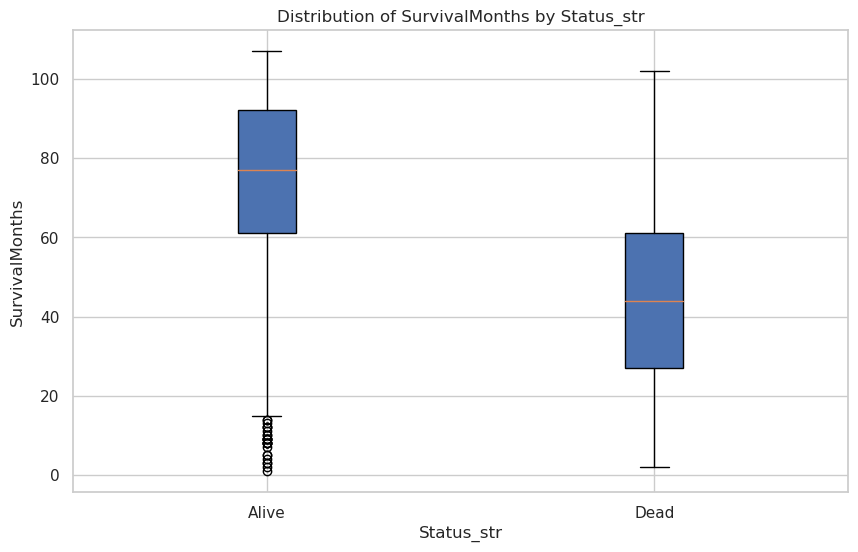

In [60]:
multiboxplot(df, "SurvivalMonths", "Status_str")